# 0 - Introdução

A análise foi realizada utilizando a base de acidentes de carros em Kensington e Chelsea entre o mês de janeiro de 2021 e setembro de 2022, os dados foram retirados do site https://www.kaggle.com/datasets/nextmillionaire/car-accident-dataset.

O objetivo desta análise é extrair insights  que possam contribuir para a compreensão dos padrões e fatores associados aos acidentes de trânsito. Ao explorar as diferentes categorias disponíveis, procuraremos identificar tendências e possíveis causas dos acidentes.

Ao compreender melhor os elementos que influenciam a ocorrência e a gravidade dos acidentes, podemos contribuir para o desenvolvimento de estratégias mais eficazes de prevenção e segurança no trânsito. Esta análise tem o potencial de fornecer informações acionáveis ​​que possam ser utilizadas por autoridades de trânsito, planejadores urbanos e outros profissionais envolvidos na promoção da segurança viária e na redução de incidentes no futuro.

Dicionário de dados

- Accident_Index: Um identificador único para cada registro de acidente.

- Accident Date: A data em que ocorreu o acidente (formato: DD/MM/AAAA).- 

- Day_of_Week: O dia da semana em que o acidente ocorreu.

- Junction_Control: Descreve o tipo de controle de cruzamento no local do acidente (por exemplo, "Ceder a passagem ou não controlado").

- Junction_Detail: Fornece detalhes adicionais sobre o cruzamento onde ocorreu o acidente (por exemplo, "T ou cruzamento escalonado").

- Accident_Severity: Indica a gravidade do acidente (por exemplo, "Grave").

- Latitude: A latitude geográfica do local do acidente.

- Light_Conditions: Descreve as condições de iluminação no momento do acidente (por exemplo, "Luz do dia").

- Local_Authority_(District): O distrito da autoridade local onde ocorreu o acidente.

- Carriageway_Hazards: Descreve quaisquer perigos presentes na pista no momento do acidente (por exemplo, "Nenhum").

- Longitude: A longitude geográfica do local do acidente.

- Number_of_Casualties: O número total de vítimas envolvidas no acidente.

- Number_of_Vehicles: O número total de veículos envolvidos no acidente.

- Police_Force: A força policial que lidou com o acidente.

- Road_Surface_Conditions: Descreve as condições da superfície da estrada no momento do acidente (por exemplo, "Seca").

- Road_Type: Especifica o tipo de estrada onde ocorreu o acidente (por exemplo, "Rua de sentido único").

- Speed_limit: O limite de velocidade aplicável à estrada onde ocorreu o acidente.

- Time: A hora do dia em que o acidente aconteceu (formato: HH:MM).

- Urban_or_Rural_Area: Indica se o acidente ocorreu em uma área urbana ou rural.

- Weather_Conditions: Descreve as condições meteorológicas no momento do acidente (por exemplo, "Bom, sem ventos fortes").

- Vehicle_Type: Especifica o tipo de veículo envolvido no acidente (por exemplo, "Carro", "Táxi/Carro de aluguel privado").

<hr>

# 1 - Importação de bibliotecas

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")

Bibliotecas:

- Pandas: Manipulação da base.

- Numpy: Biblioteca com funções matemáticas.

- Seaborn e Matplotlib: Geração de gráficos.

- Folium: Plotar um mapa geográfico.

# 2 - Análise e limpeza da base

Importação da base

In [27]:
file_path = "../data/road_accident_data.csv"

df = pd.read_csv(file_path)
df.head()

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,1/1/2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,None,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,1/5/2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,None,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,1/4/2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,None,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,1/5/2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,None,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,8:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,1/6/2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,None,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car


Checando total de linhas e colunas

In [28]:
total_lines = df.shape[0]
total_columns = df.shape[1]

print(f"O dataset possui um total de {total_lines} linhas e um total de {total_columns} colunas.")

O dataset possui um total de 307973 linhas e um total de 21 colunas.


Verificando a informação das colunas

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident_Index              307973 non-null  object 
 1   Accident Date               307973 non-null  object 
 2   Day_of_Week                 307973 non-null  object 
 3   Junction_Control            307973 non-null  object 
 4   Junction_Detail             307973 non-null  object 
 5   Accident_Severity           307973 non-null  object 
 6   Latitude                    307973 non-null  float64
 7   Light_Conditions            307973 non-null  object 
 8   Local_Authority_(District)  307973 non-null  object 
 9   Carriageway_Hazards         307970 non-null  object 
 10  Longitude                   307973 non-null  float64
 11  Number_of_Casualties        307973 non-null  int64  
 12  Number_of_Vehicles          307973 non-null  int64  
 13  Police_Force  

Checando o total de dados nulos por cada coluna

In [30]:
df.isnull().sum()

Accident_Index                   0
Accident Date                    0
Day_of_Week                      0
Junction_Control                 0
Junction_Detail                  0
Accident_Severity                0
Latitude                         0
Light_Conditions                 0
Local_Authority_(District)       0
Carriageway_Hazards              3
Longitude                        0
Number_of_Casualties             0
Number_of_Vehicles               0
Police_Force                     0
Road_Surface_Conditions        317
Road_Type                     1534
Speed_limit                      0
Time                            17
Urban_or_Rural_Area              0
Weather_Conditions            6057
Vehicle_Type                     0
dtype: int64

Possuimos valores nulos nas colunas Carriageway_Hazards, Road_Surface_Conditions, Road_Type, Time e Weather_Conditions.

In [31]:
df['Carriageway_Hazards'].value_counts()

None                                               302546
Other object on road                                 2243
Any animal in carriageway (except ridden horse)      1620
Pedestrian in carriageway - not injured               715
Previous accident                                     511
Vehicle load on road                                  335
Name: Carriageway_Hazards, dtype: int64

Para os dados de perigo na pista que não possuem indicação, para não deixar como nulos indicaremos como nenhum.

In [32]:
df['Carriageway_Hazards'] = df['Carriageway_Hazards'].fillna("None")

Para os outros dados, como possuem mais informações, preencheremos como desconhecidos.

In [33]:
df['Road_Surface_Conditions'] = df['Road_Surface_Conditions'].fillna("Unknown")
df['Road_Type'] = df['Road_Type'].fillna("Unknown")
df['Time'] = df['Time'].fillna("Unknown")
df['Weather_Conditions'] = df['Weather_Conditions'].fillna("Unknown")

In [34]:
df.isnull().sum()

Accident_Index                0
Accident Date                 0
Day_of_Week                   0
Junction_Control              0
Junction_Detail               0
Accident_Severity             0
Latitude                      0
Light_Conditions              0
Local_Authority_(District)    0
Carriageway_Hazards           0
Longitude                     0
Number_of_Casualties          0
Number_of_Vehicles            0
Police_Force                  0
Road_Surface_Conditions       0
Road_Type                     0
Speed_limit                   0
Time                          0
Urban_or_Rural_Area           0
Weather_Conditions            0
Vehicle_Type                  0
dtype: int64

Com todos dados nulos preenchidos, podemos verificar se o dataset possui linhas duplicadas

In [35]:
print(f"O dataset possui {df.duplicated().sum()} linha(s) duplicada(s)")

O dataset possui 1 linha(s) duplicada(s)


Excluindo a linha duplicada

In [36]:
df.drop_duplicates(keep='first', inplace=True)

Por fim, podemos verificar a análise estatística da base das variáveis numéricas

In [37]:
df.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles,Speed_limit
count,307972.000000,307972.000000,307972.000000,307972.000000,307972.000000
mean,52.487001,-1.368882,1.356883,1.829066,38.866001
std,1.339011,1.356093,0.815858,0.710476,14.032942
min,49.914488,-7.516225,1.000000,1.000000,10.000000
25%,51.485248,-2.247942,1.000000,1.000000,30.000000
50%,52.225935,-1.349254,1.000000,2.000000,30.000000
75%,53.415514,-0.206810,1.000000,2.000000,50.000000
max,60.598055,1.759398,48.000000,32.000000,70.000000


Convertendo milhas para km/h para a métrica utilizada no Brasil.

In [38]:
def milhas_para_km(milhas):
    km = milhas * 1.60934
    return km

In [39]:
df['Speed_limit'] = df['Speed_limit'].apply(milhas_para_km)
df['Speed_limit'].head()

0    48.2802
1    48.2802
2    48.2802
3    48.2802
4    48.2802
Name: Speed_limit, dtype: float64

Identificado que na severidade existe um nome incorreto, alterando para o valor certo.

In [40]:
df.loc[df['Accident_Severity'] == 'Fetal', 'Accident_Severity'] = 'Fatal'

Exportando o dataset tratado.

In [41]:
df.to_csv("../data/road_accident_data_tratado.csv")

<hr>

# 3 - Análise univariada

In [44]:
print(f"O período da análise inicia no dia {df['Accident Date'].min()} e finaliza no dia {df['Accident Date'].max()}")

O período da análise inicia no dia 1/1/2021 e finaliza no dia 9/9/2022


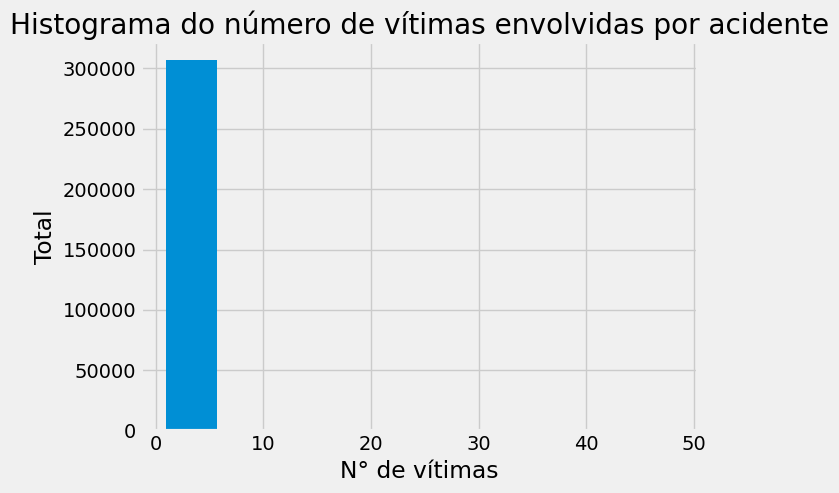

In [ ]:
_ = plt.hist(df['Number_of_Casualties'])
_ = plt.title("Histograma do número de vítimas envolvidas por acidente")
_ = plt.xlabel("N° de vítimas")
_ = plt.ylabel("Total")

Podemos verificar que a maioria dos envolvidos em um acidente circulam entre 1 e 5 pessoas.

In [ ]:
value_counts_normalized = df['Number_of_Casualties'].value_counts(normalize=True)
df_pessoas_envolvidas_acidentes_percentual = pd.DataFrame({'N° de vítimas envolvidas em um acidente': value_counts_normalized.index,
                              'Frequência Relativa': value_counts_normalized.values})
df_pessoas_envolvidas_acidentes_percentual['Frequência Relativa'] = df_pessoas_envolvidas_acidentes_percentual['Frequência Relativa'].map(lambda x: '{:.4%}'.format(x))
df_pessoas_envolvidas_acidentes_percentual = df_pessoas_envolvidas_acidentes_percentual.sort_values(by='N° de vítimas envolvidas em um acidente')
df_pessoas_envolvidas_acidentes_percentual = df_pessoas_envolvidas_acidentes_percentual.reset_index(drop=True)

print(df_pessoas_envolvidas_acidentes_percentual)

    N° de vítimas envolvidas em um acidente Frequência Relativa
0                                         1            76.3355%
1                                         2            16.2638%
2                                         3             4.6556%
3                                         4             1.7365%
4                                         5             0.6156%
5                                         6             0.2315%
6                                         7             0.0786%
7                                         8             0.0331%
8                                         9             0.0143%
9                                        10             0.0110%
10                                       11             0.0045%
11                                       12             0.0049%
12                                       13             0.0032%
13                                       14             0.0026%
14                                      

Pelo percentual, podemos observar que pelo menos uma vítima aconteceu em 76% dos acidentes.

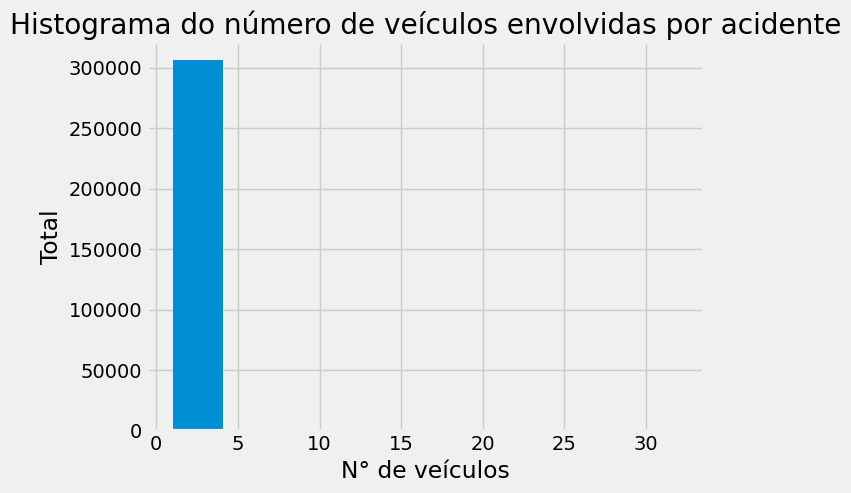

In [ ]:
_ = plt.hist(df['Number_of_Vehicles'])
_ = plt.title("Histograma do número de veículos envolvidas por acidente")
_ = plt.xlabel("N° de veículos")
_ = plt.ylabel("Total")

Podemos observar que grande parte dos acidentes envolvem entre um e cinco veículos.

In [ ]:
value_counts_normalized = df['Number_of_Vehicles'].value_counts(normalize=True)
df_veiculos_envolvidas_acidentes_percentual = pd.DataFrame({'N° de veículos envolvidas em um acidente': value_counts_normalized.index,
                              'Frequência Relativa': value_counts_normalized.values})
df_veiculos_envolvidas_acidentes_percentual['Frequência Relativa'] = df_veiculos_envolvidas_acidentes_percentual['Frequência Relativa'].map(lambda x: '{:.4%}'.format(x))
df_veiculos_envolvidas_acidentes_percentual = df_veiculos_envolvidas_acidentes_percentual.sort_values(by='N° de veículos envolvidas em um acidente')
df_veiculos_envolvidas_acidentes_percentual = df_veiculos_envolvidas_acidentes_percentual.reset_index(drop=True)

print(df_veiculos_envolvidas_acidentes_percentual)

    N° de veículos envolvidas em um acidente Frequência Relativa
0                                          1            30.3105%
1                                          2            59.6142%
2                                          3             7.8663%
3                                          4             1.6485%
4                                          5             0.3659%
5                                          6             0.1123%
6                                          7             0.0412%
7                                          8             0.0205%
8                                          9             0.0101%
9                                         10             0.0039%
10                                        11             0.0019%
11                                        12             0.0013%
12                                        13             0.0016%
13                                        14             0.0006%
14                       

Podemos observar que grande partes dos acidentes acontecem sozinhos com apenas um veículo ou com dois veículos envolvidos.

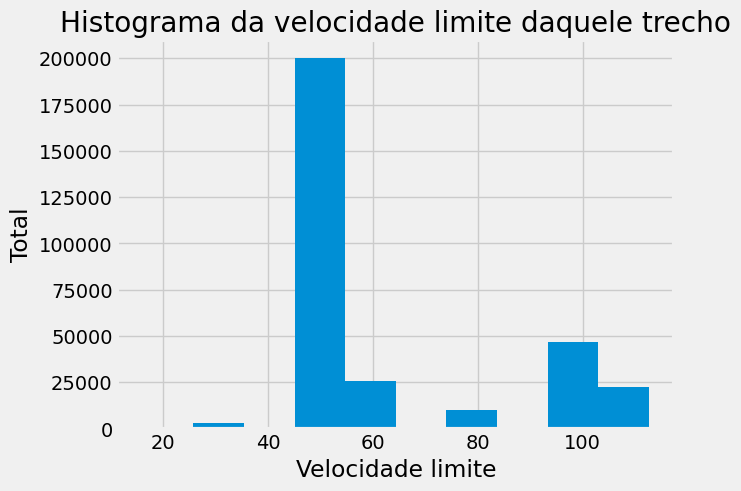

In [ ]:
_ = plt.hist(df['Speed_limit'])
_ = plt.title("Histograma da velocidade limite daquele trecho")
_ = plt.xlabel("Velocidade limite")
_ = plt.ylabel("Total")

Podemos observar que grande parte dos acidentes ocorreram em trecho de até 50 km por hora

In [ ]:
value_counts_normalized = df['Speed_limit'].value_counts(normalize=True)
df_limite_do_trecho = pd.DataFrame({'Limite de velocidade no trecho': value_counts_normalized.index,
                              'Frequência Relativa': value_counts_normalized.values})
df_limite_do_trecho['Frequência Relativa'] = df_limite_do_trecho['Frequência Relativa'].map(lambda x: '{:.4%}'.format(x))
df_limite_do_trecho = df_limite_do_trecho.sort_values(by='Limite de velocidade no trecho')
df_limite_do_trecho = df_limite_do_trecho.reset_index(drop=True)

print(df_limite_do_trecho)

   Limite de velocidade no trecho Frequência Relativa
0                         16.0934             0.0010%
1                         24.1401             0.0006%
2                         32.1868             0.9413%
3                         48.2802            64.9540%
4                         64.3736             8.3287%
5                         80.4670             3.3087%
6                         96.5604            15.2046%
7                        112.6538             7.2610%


Como podemos observar, o limite de velocidade do trecho que ocorreu o acidente gira em torno de 50 km/h, ou seja, a velocidade não é o principal fator causador de um acidente.

Text(0, 0.5, 'Total')

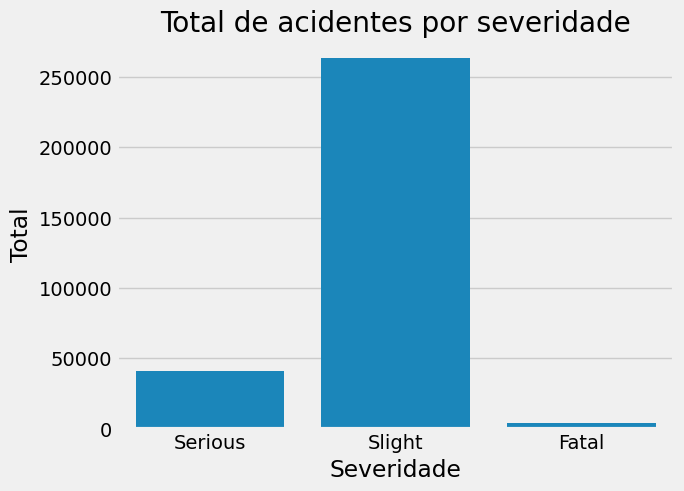

In [ ]:
sns.countplot(data = df,x = 'Accident_Severity')
plt.title('Total de acidentes por severidade')
plt.xlabel("Severidade")
plt.ylabel("Total")

Grande parte dos acidentes tiveram pouca gravidade.

In [ ]:
value_counts_normalized = df['Accident_Severity'].value_counts(normalize=True)
df_severidade = pd.DataFrame({'Severidade do acidente': value_counts_normalized.index,
                              'Frequência Relativa': value_counts_normalized.values})
df_severidade['Frequência Relativa'] = df_severidade['Frequência Relativa'].map(lambda x: '{:.4%}'.format(x))
df_severidade = df_severidade.sort_values(by='Severidade do acidente')
df_severidade = df_severidade.reset_index(drop=True)

print(df_severidade)

  Severidade do acidente Frequência Relativa
0                  Fatal             1.2836%
1                Serious            13.2285%
2                 Slight            85.4880%


Cera de 85% dos acidentes possuem pouca gravidade, porém o índice de 13% de acidentes sérios, é um número alto que podemos utilizar para entender as tendências deles.

Text(0, 0.5, 'Total')

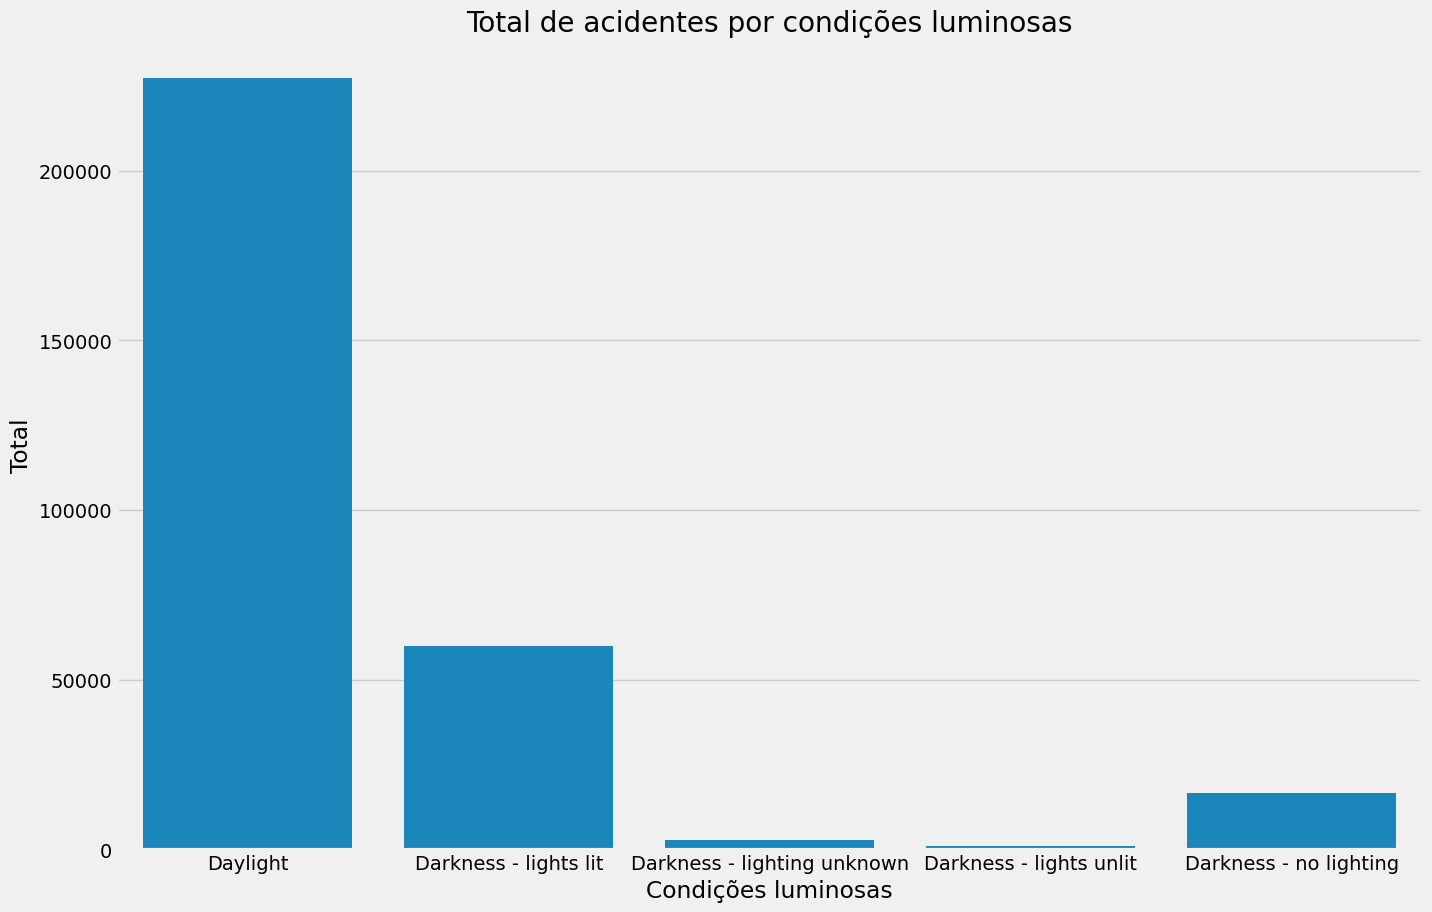

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data = df,x = 'Light_Conditions')
plt.title('Total de acidentes por condições luminosas')
plt.xlabel("Condições luminosas")
plt.ylabel("Total")

Grande parte dos acidentes acontecem com a luz do dia ainda existente.

In [ ]:
value_counts_normalized = df['Light_Conditions'].value_counts(normalize=True)
df_condicoes_luminosas = pd.DataFrame({'Condições luminosas do acidente': value_counts_normalized.index,
                              'Frequência Relativa': value_counts_normalized.values})
df_condicoes_luminosas['Frequência Relativa'] = df_condicoes_luminosas['Frequência Relativa'].map(lambda x: '{:.4%}'.format(x))
df_condicoes_luminosas = df_condicoes_luminosas.sort_values(by='Condições luminosas do acidente')
df_condicoes_luminosas = df_condicoes_luminosas.reset_index(drop=True)

print(df_condicoes_luminosas)

  Condições luminosas do acidente Frequência Relativa
0     Darkness - lighting unknown             0.9494%
1           Darkness - lights lit            19.5125%
2         Darkness - lights unlit             0.3708%
3          Darkness - no lighting             5.3667%
4                        Daylight            73.8005%


Cerca de 73% dos acidentes aconteceram durante o dia, ou seja, o fator noite não influencia na ocorrência de mais acidentes.

Text(0, 0.5, 'Total')

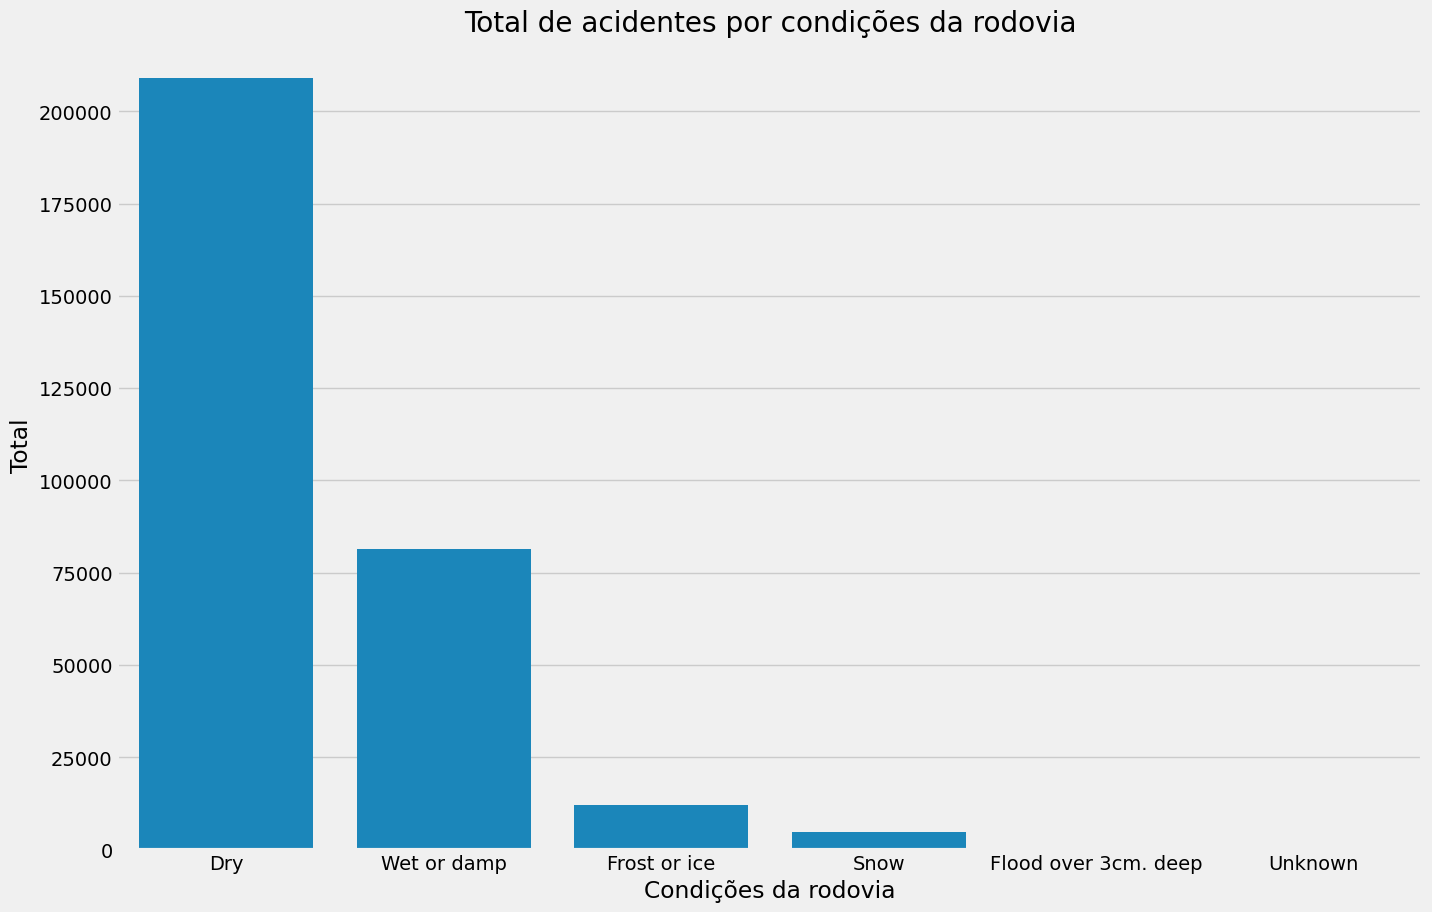

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data = df,x = 'Road_Surface_Conditions')
plt.title('Total de acidentes por condições da rodovia')
plt.xlabel("Condições da rodovia")
plt.ylabel("Total")

Grande parte dos acidentes aconteceram com a rodovia estando seca no momento.

In [ ]:
value_counts_normalized = df['Road_Surface_Conditions'].value_counts(normalize=True)
df_condicoes_da_rodovia = pd.DataFrame({'Condições da rodovia no acidente': value_counts_normalized.index,
                              'Frequência Relativa': value_counts_normalized.values})
df_condicoes_da_rodovia['Frequência Relativa'] = df_condicoes_da_rodovia['Frequência Relativa'].map(lambda x: '{:.4%}'.format(x))
df_condicoes_da_rodovia = df_condicoes_da_rodovia.sort_values(by='Condições da rodovia no acidente')
df_condicoes_da_rodovia = df_condicoes_da_rodovia.reset_index(drop=True)

print(df_condicoes_da_rodovia)

  Condições da rodovia no acidente Frequência Relativa
0                              Dry            67.8526%
1             Flood over 3cm. deep             0.1214%
2                     Frost or ice             3.9215%
3                             Snow             1.5449%
4                          Unknown             0.1029%
5                      Wet or damp            26.4566%


Como podemos observar, 67% dos acidentes ocorreram com a rodovia seca no momento do acidente, indicando que condições adversas não foram o principal fator causador dos acidentes.

Text(0, 0.5, 'Total')

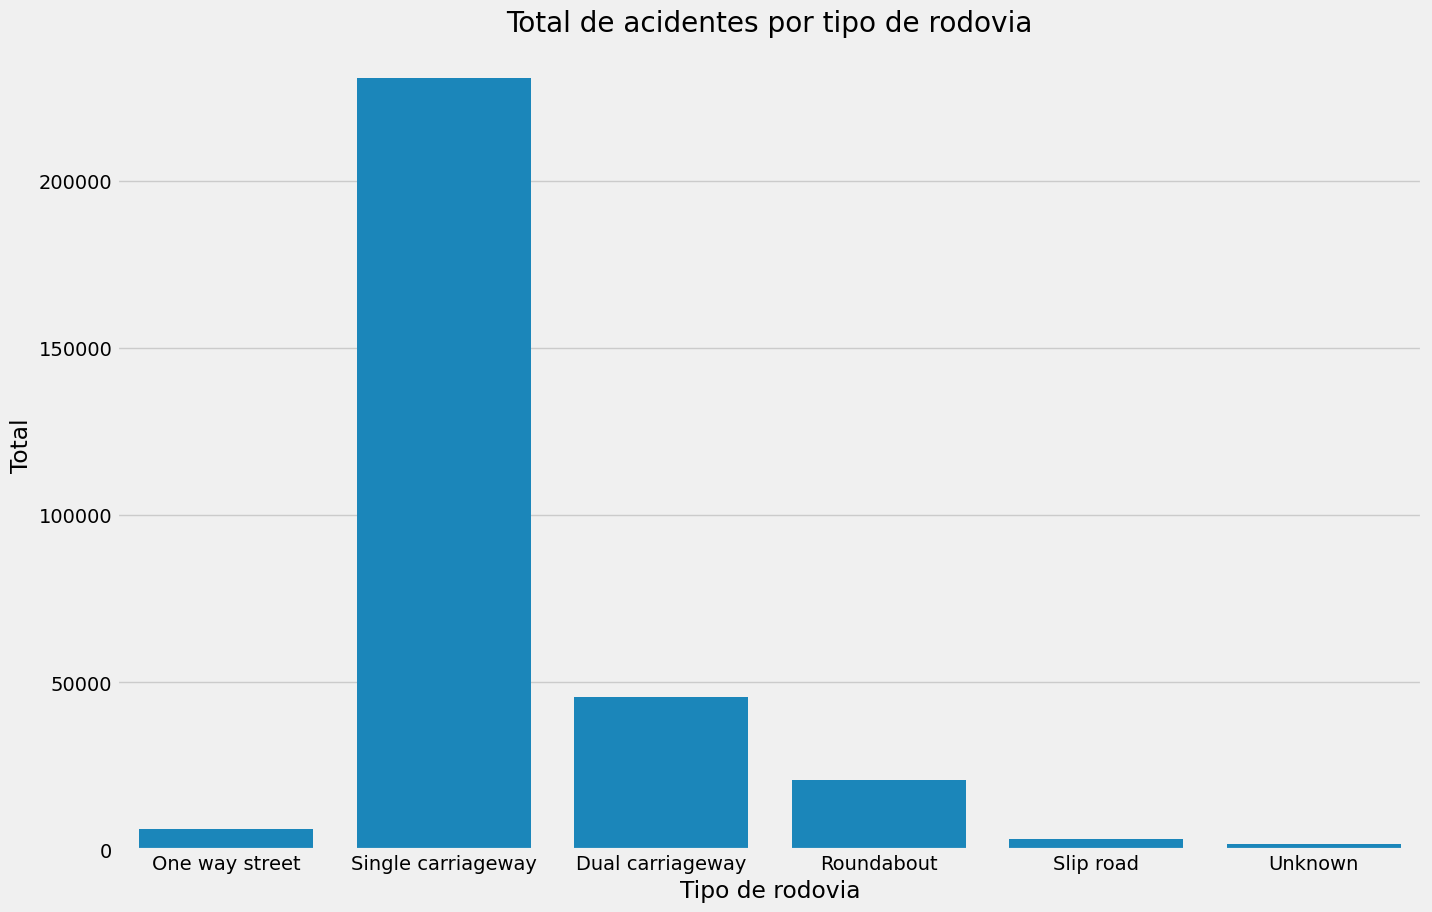

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data = df,x = 'Road_Type')
plt.title('Total de acidentes por tipo de rodovia')
plt.xlabel("Tipo de rodovia")
plt.ylabel("Total")

Grande parte dos acidentes aconteceram em vias de mão única com duas direções.

In [ ]:
value_counts_normalized = df['Road_Type'].value_counts(normalize=True)
df_road_type = pd.DataFrame({'Condições do tipo da rodovia': value_counts_normalized.index,
                              'Frequência Relativa': value_counts_normalized.values})
df_road_type['Frequência Relativa'] = df_road_type['Frequência Relativa'].map(lambda x: '{:.4%}'.format(x))
df_road_type = df_road_type.sort_values(by='Condições do tipo da rodovia')
df_road_type = df_road_type.reset_index(drop=True)

print(df_road_type)

  Condições do tipo da rodovia Frequência Relativa
0             Dual carriageway            14.7634%
1               One way street             2.0122%
2                   Roundabout             6.7957%
3           Single carriageway            74.8805%
4                    Slip road             1.0501%
5                      Unknown             0.4981%


Como podemos observar, cerca de 74% dos acidentes aconteceram em vias de mão única com duas direções, provavelmente causados por ultrapassagens imprudentes durante esse trecho ao tentar passar um carro mais lento.

Text(0, 0.5, 'Total')

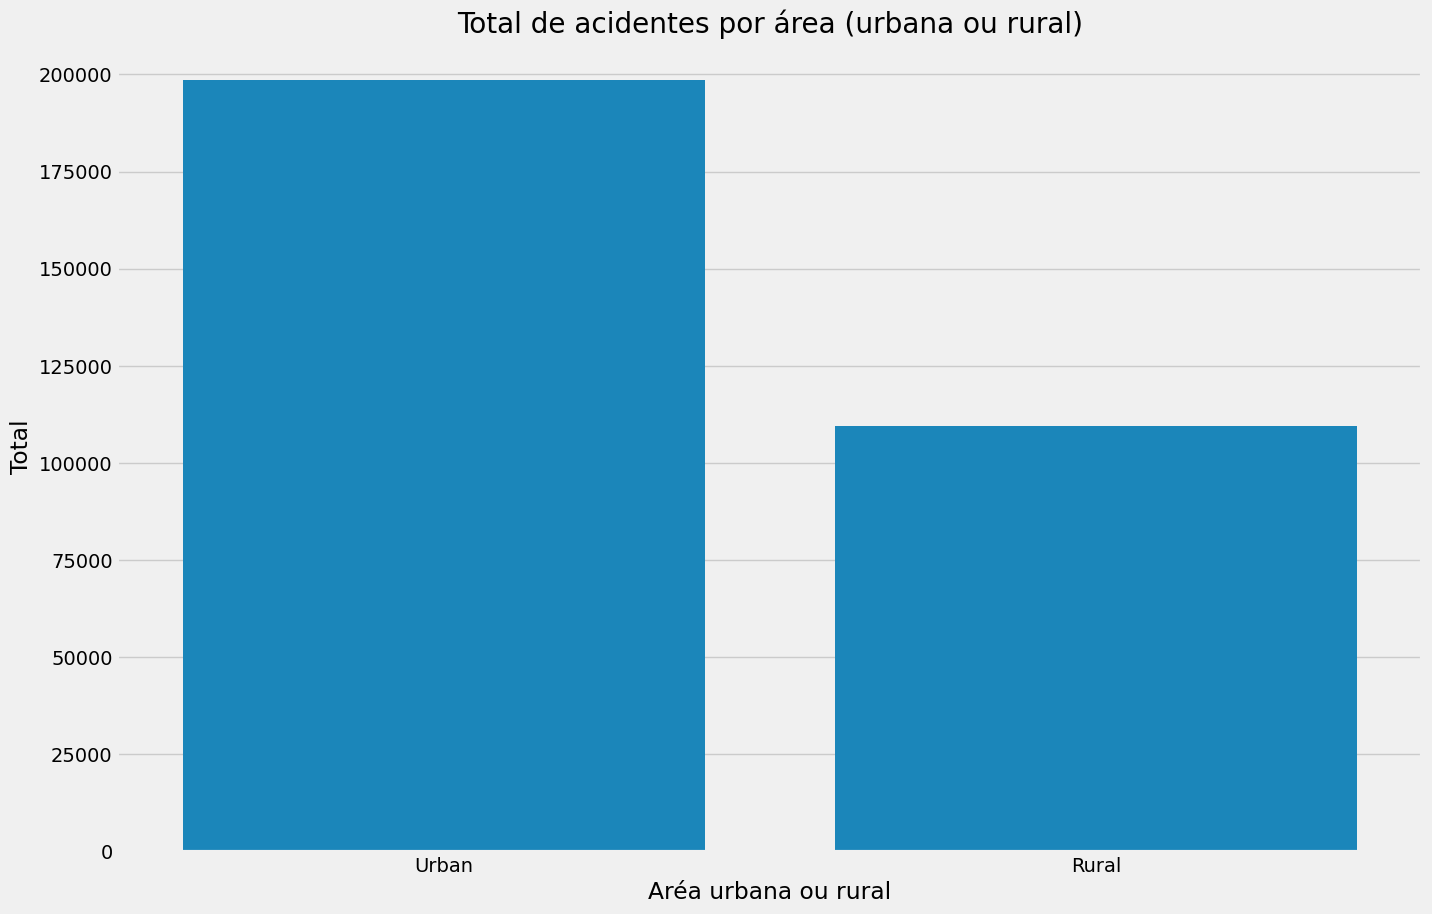

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data = df,x = 'Urban_or_Rural_Area')
plt.title('Total de acidentes por área (urbana ou rural)')
plt.xlabel("Aréa urbana ou rural")
plt.ylabel("Total")

Podemos observar que a maior parte dos acidentes ocorreram em trechos urbanos.

Text(0, 0.5, 'Total')

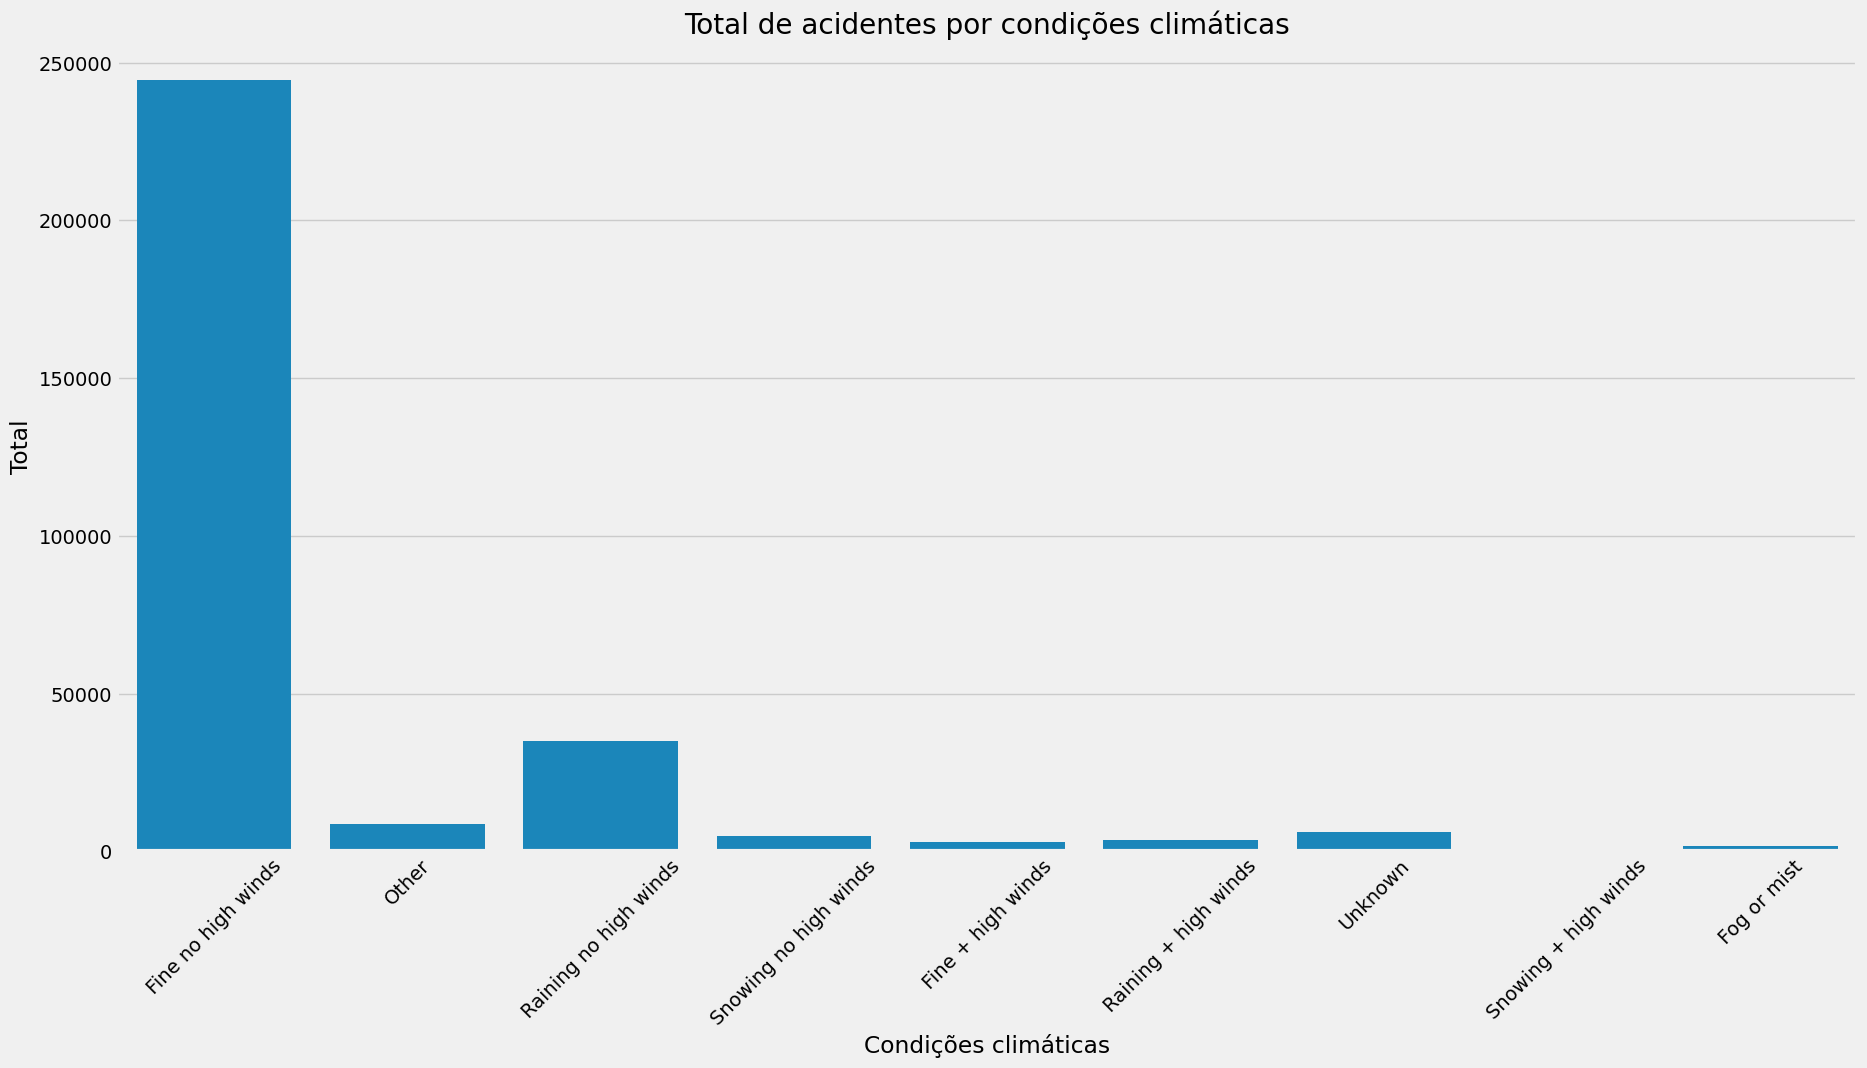

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(data=df, x='Weather_Conditions')
plt.title('Total de acidentes por condições climáticas')
plt.xticks(rotation=45)
plt.xlabel("Condições climáticas")
plt.ylabel("Total")

Grande parte dos acidentes ocorreram em condições climáticas normais.

In [ ]:
value_counts_normalized = df['Weather_Conditions'].value_counts(normalize=True)
df_wheater_conditions = pd.DataFrame({'Condições climáticas': value_counts_normalized.index,
                              'Frequência Relativa': value_counts_normalized.values})
df_wheater_conditions['Frequência Relativa'] = df_wheater_conditions['Frequência Relativa'].map(lambda x: '{:.4%}'.format(x))
df_wheater_conditions = df_wheater_conditions.sort_values(by='Condições climáticas')
df_wheater_conditions = df_wheater_conditions.reset_index(drop=True)

print(df_wheater_conditions)

    Condições climáticas Frequência Relativa
0      Fine + high winds             1.0222%
1     Fine no high winds            79.3887%
2            Fog or mist             0.5488%
3                  Other             2.8581%
4   Raining + high winds             1.1449%
5  Raining no high winds            11.3247%
6   Snowing + high winds             0.1747%
7  Snowing no high winds             1.5712%
8                Unknown             1.9667%


Como podemos observar, cerca de 79% dos acidentes ocorreram em climas normais, ou seja, não possui uma relação clara como causador principal dos acidentes.

Text(0, 0.5, 'Total')

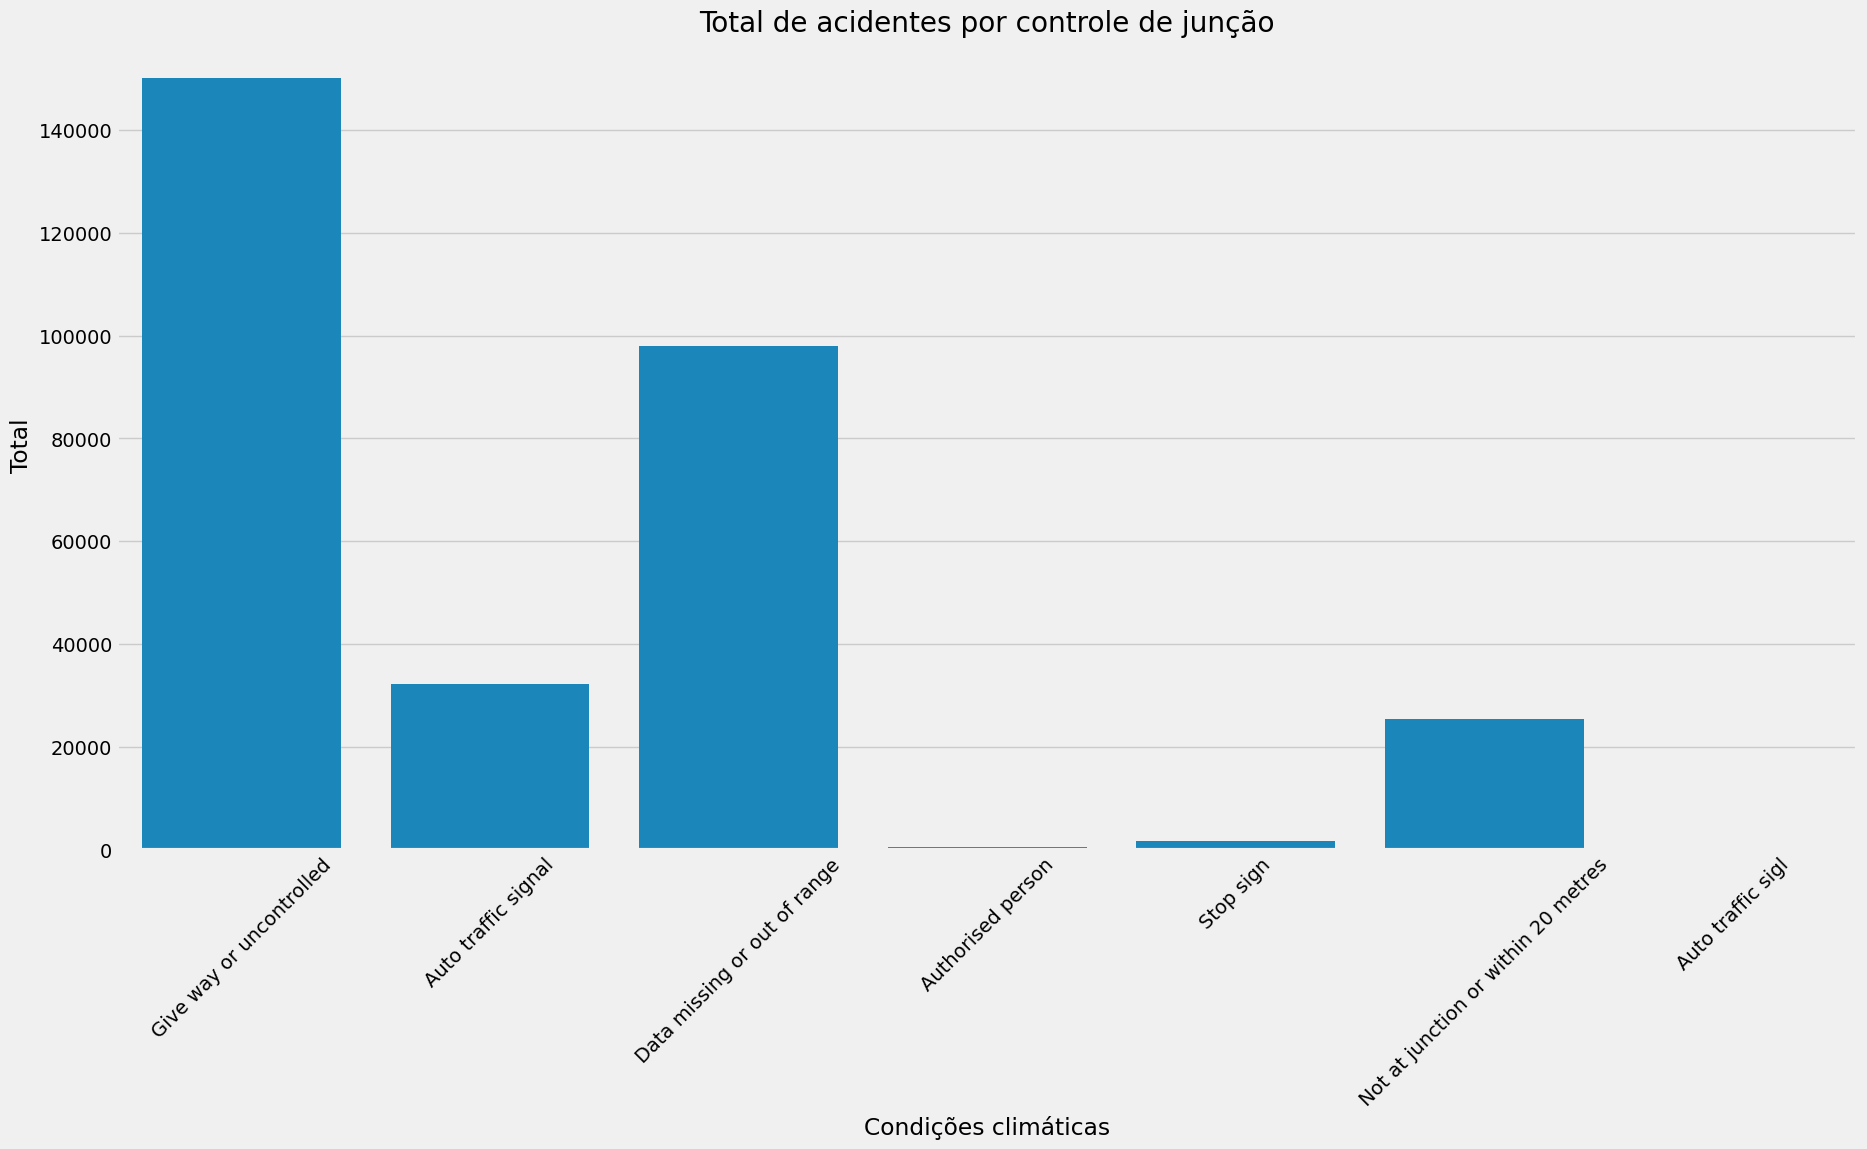

In [46]:
plt.figure(figsize=(20,10))
sns.countplot(data=df, x='Junction_Control')
plt.title('Total de acidentes por controle de junção')
plt.xticks(rotation=45)
plt.xlabel("Condições climáticas")
plt.ylabel("Total")

In [47]:
value_counts_normalized = df['Junction_Control'].value_counts(normalize=True)
df_junction_control = pd.DataFrame({'Controle de junção': value_counts_normalized.index,
                              'Frequência Relativa': value_counts_normalized.values})
df_junction_control['Frequência Relativa'] = df_junction_control['Frequência Relativa'].map(lambda x: '{:.4%}'.format(x))
df_junction_control = df_junction_control.sort_values(by='Controle de junção')
df_junction_control = df_junction_control.reset_index(drop=True)

print(df_junction_control)

                    Controle de junção Frequência Relativa
0                    Authorised person             0.1494%
1                    Auto traffic sigl             0.0302%
2                  Auto traffic signal            10.4737%
3         Data missing or out of range            31.8389%
4             Give way or uncontrolled            48.7203%
5  Not at junction or within 20 metres             8.2404%
6                            Stop sign             0.5471%


Text(0, 0.5, 'Total')

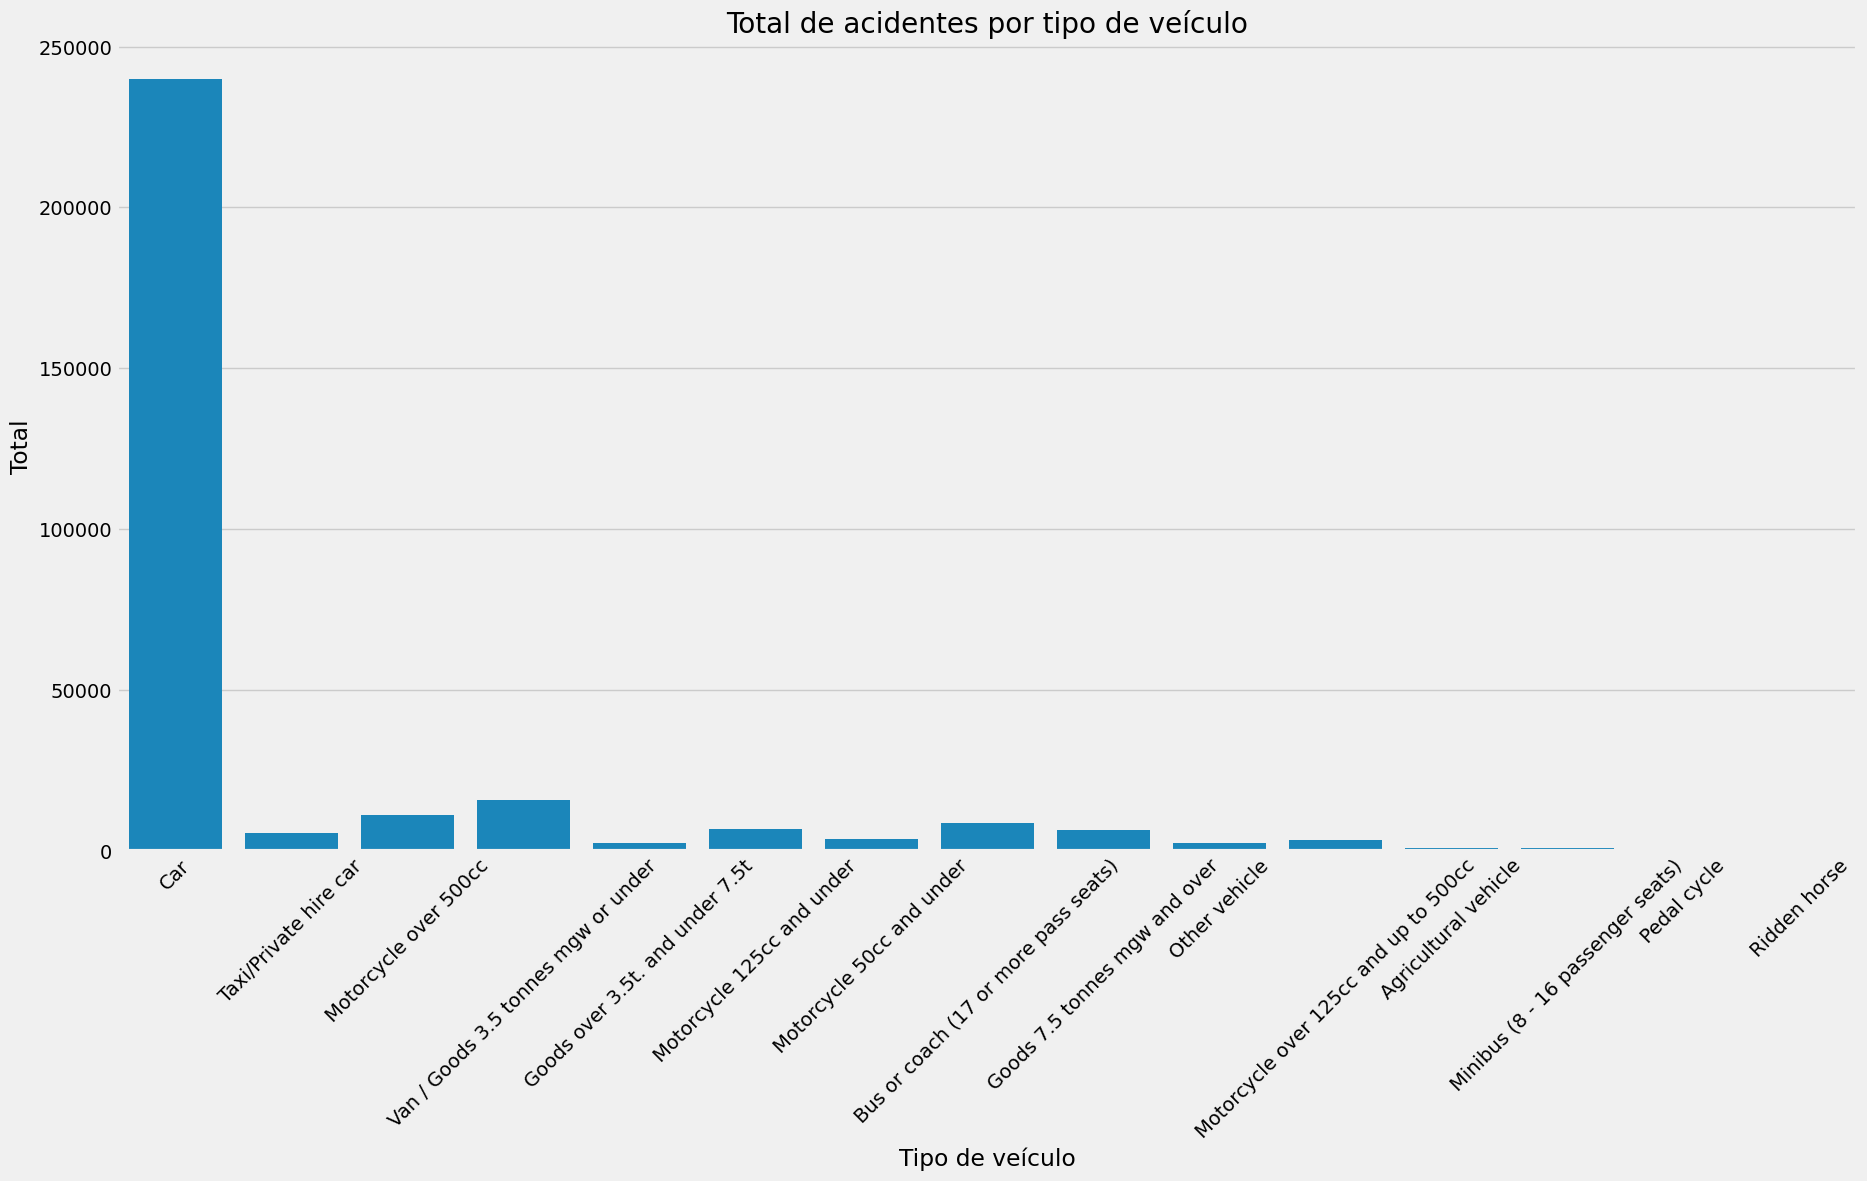

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(data = df,x = 'Vehicle_Type')
plt.title('Total de acidentes por tipo de veículo')
plt.xticks(rotation=45)
plt.xlabel("Tipo de veículo")
plt.ylabel("Total")

Grande parte dos acidentes ocorreram por carros normais de passeio.

In [ ]:
value_counts_normalized = df['Vehicle_Type'].value_counts(normalize=True)
df_vehicle_type = pd.DataFrame({'Tipo de veículo': value_counts_normalized.index,
                              'Frequência Relativa': value_counts_normalized.values})
df_vehicle_type['Frequência Relativa'] = df_vehicle_type['Frequência Relativa'].map(lambda x: '{:.4%}'.format(x))
df_vehicle_type = df_vehicle_type.sort_values(by='Tipo de veículo')
df_vehicle_type = df_vehicle_type.reset_index(drop=True)

print(df_vehicle_type)

                          Tipo de veículo Frequência Relativa
0                    Agricultural vehicle             0.2432%
1    Bus or coach (17 or more pass seats)             2.8204%
2                                     Car            77.8619%
3           Goods 7.5 tonnes mgw and over             2.1210%
4         Goods over 3.5t. and under 7.5t             0.8124%
5        Minibus (8 - 16 passenger seats)             0.2666%
6              Motorcycle 125cc and under             2.2249%
7               Motorcycle 50cc and under             1.2024%
8   Motorcycle over 125cc and up to 500cc             1.0667%
9                   Motorcycle over 500cc             3.6451%
10                          Other vehicle             0.8170%
11                            Pedal cycle             0.0214%
12                           Ridden horse             0.0010%
13                  Taxi/Private hire car             1.7998%
14    Van / Goods 3.5 tonnes mgw or under             5.0962%


Cerca de 77% dos acidentes ocorreram a partir de carros normais de passeio. É algo normal de se imaginar já que a frota de carros é maior que qualquer outro tipo de veículo num geral.

Text(0, 0.5, 'Total')

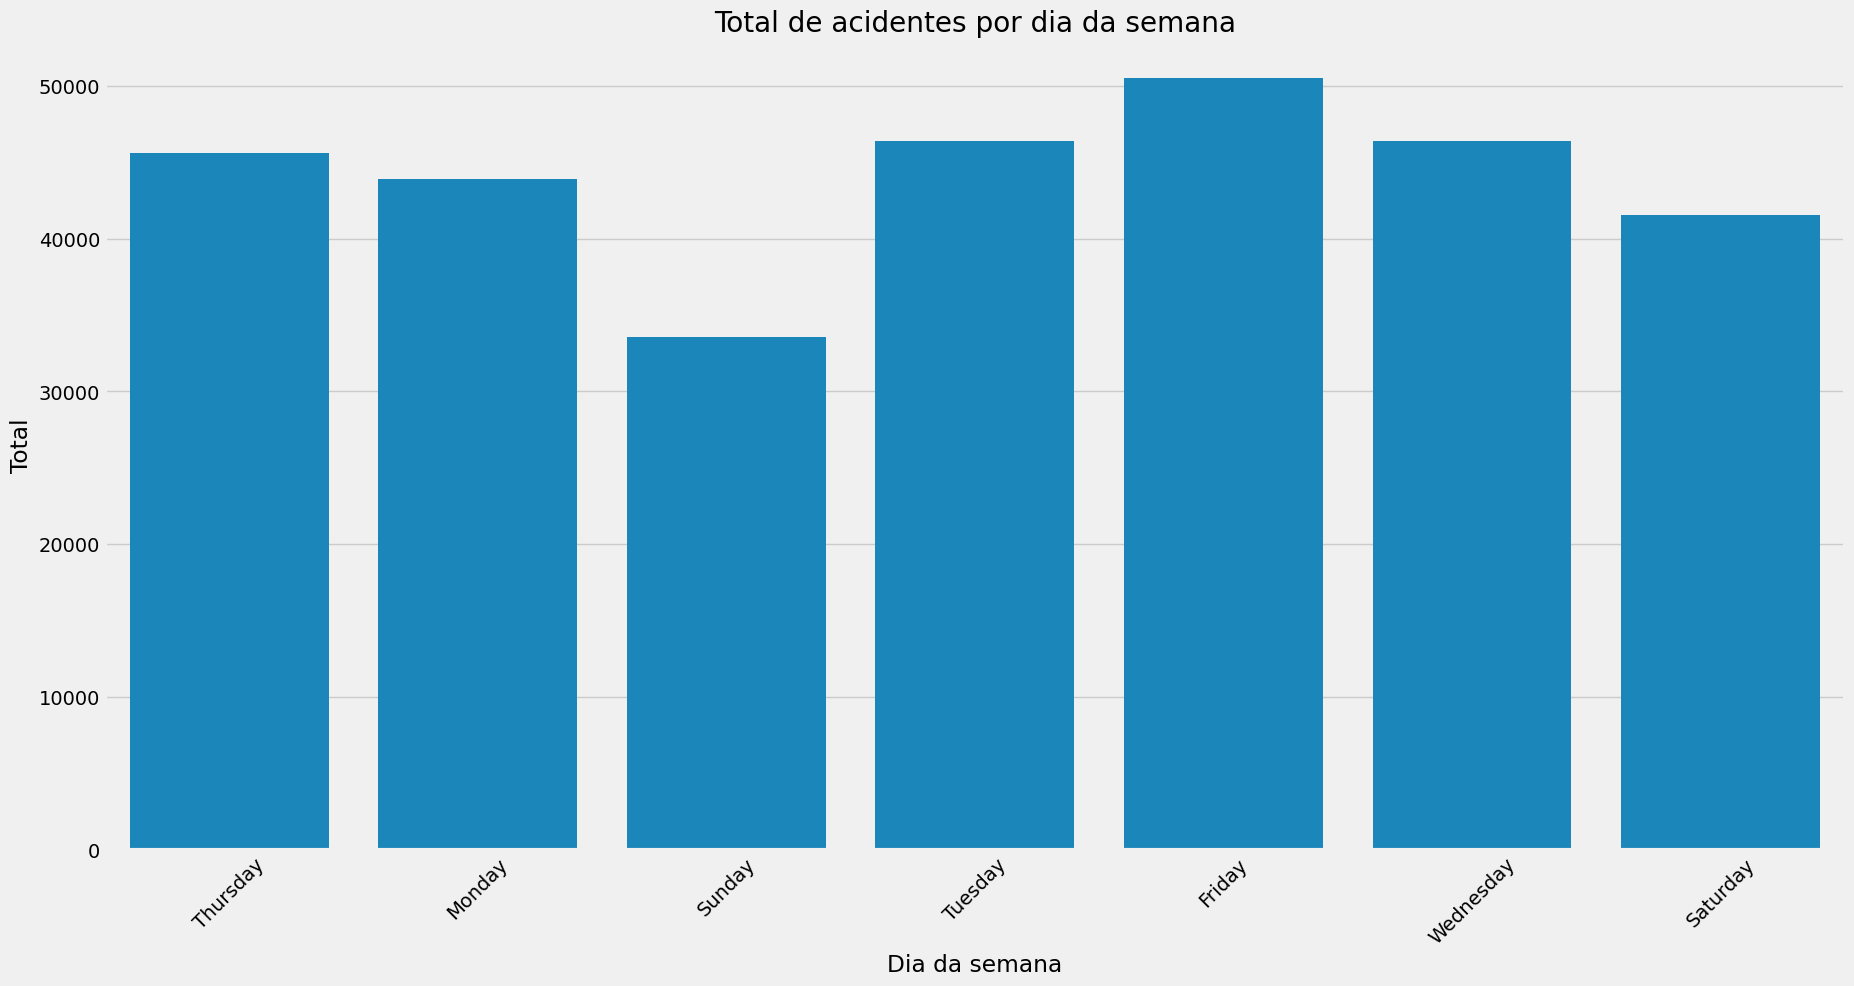

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(data=df, x='Day_of_Week')
plt.title('Total de acidentes por dia da semana')
plt.xticks(rotation=45)
plt.xlabel("Dia da semana")
plt.ylabel("Total")

O dia da semana que mais aconteceu acidentes foi na sexta, podendo indicar uma pressa maior dos motoristas para chegar em casa.

<hr>

## 4 - Análise multivariada

Identificando tendências com a velocidade média

In [ ]:
df_severity = df.groupby("Accident_Severity").mean().reset_index()
df_severity

C:\Users\Adriana\AppData\Local\Temp\ipykernel_16532\109449805.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_severity = df.groupby("Accident_Severity").mean().reset_index()


,Accident_Severity,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles,Speed_limit
0,Fatal,52.522090,-1.376112,1.804958,1.758158,75.707783
1,Serious,52.559453,-1.368462,1.455866,1.677933,65.322060
2,Slight,52.475263,-1.368839,1.334839,1.853517,61.921866


C:\Users\Adriana\AppData\Local\Temp\ipykernel_16532\585469486.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df_severity, x = 'Accident_Severity', y = "Speed_limit", palette="rocket")


Text(0, 0.5, 'Velocidade média')

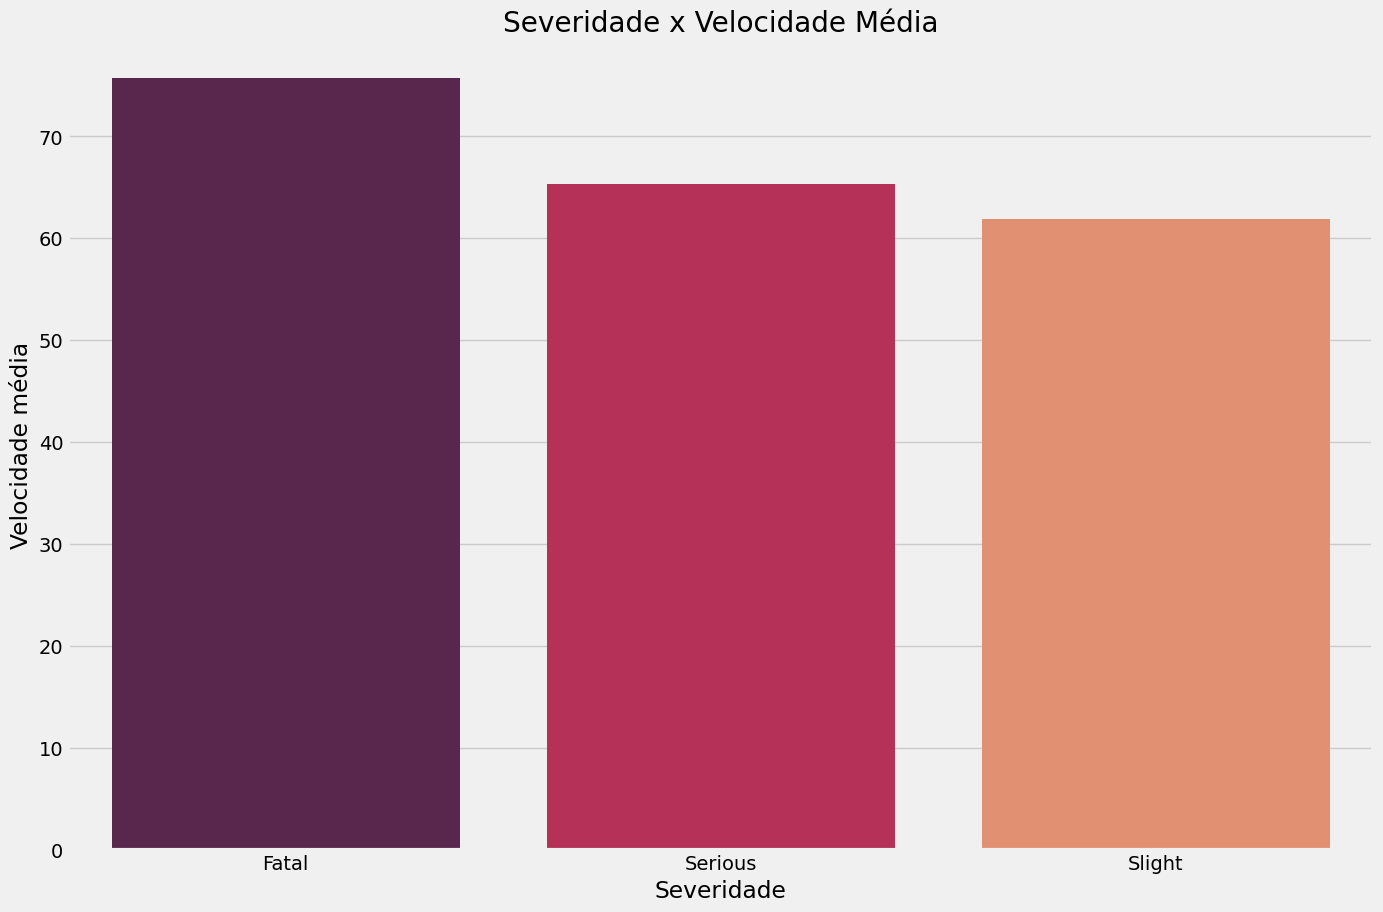

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(data = df_severity, x = 'Accident_Severity', y = "Speed_limit", palette="rocket")
plt.title("Severidade x Velocidade Média")
plt.xlabel("Severidade")
plt.ylabel("Velocidade média")

É bem nítido que os acidentes fatais, foram aqueles que em média estavam numa velocidade mais alta, como é de se esperar já que torna o impacto mais grave.

In [ ]:
df_road_conditions = df.groupby("Road_Surface_Conditions").mean().reset_index()
df_road_conditions

C:\Users\Adriana\AppData\Local\Temp\ipykernel_16532\993140090.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_road_conditions = df.groupby("Road_Surface_Conditions").mean().reset_index()


,Road_Surface_Conditions,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles,Speed_limit
0,Dry,52.412990,-1.316826,1.337269,1.841291,60.814780
1,Flood over 3cm. deep,52.680556,-1.603605,1.508021,1.622995,88.298548
2,Frost or ice,52.615144,-1.429808,1.350087,1.654716,71.424207
3,Snow,52.912979,-1.446921,1.360866,1.753258,68.229522
4,Unknown,53.069868,-0.921199,1.249211,1.712934,61.682905
5,Wet or damp,52.629789,-1.489466,1.407688,1.829379,65.233189


C:\Users\Adriana\AppData\Local\Temp\ipykernel_16532\1184218060.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df_road_conditions, x = 'Road_Surface_Conditions', y = "Speed_limit", palette="rocket")


Text(0, 0.5, 'Velocidade média')

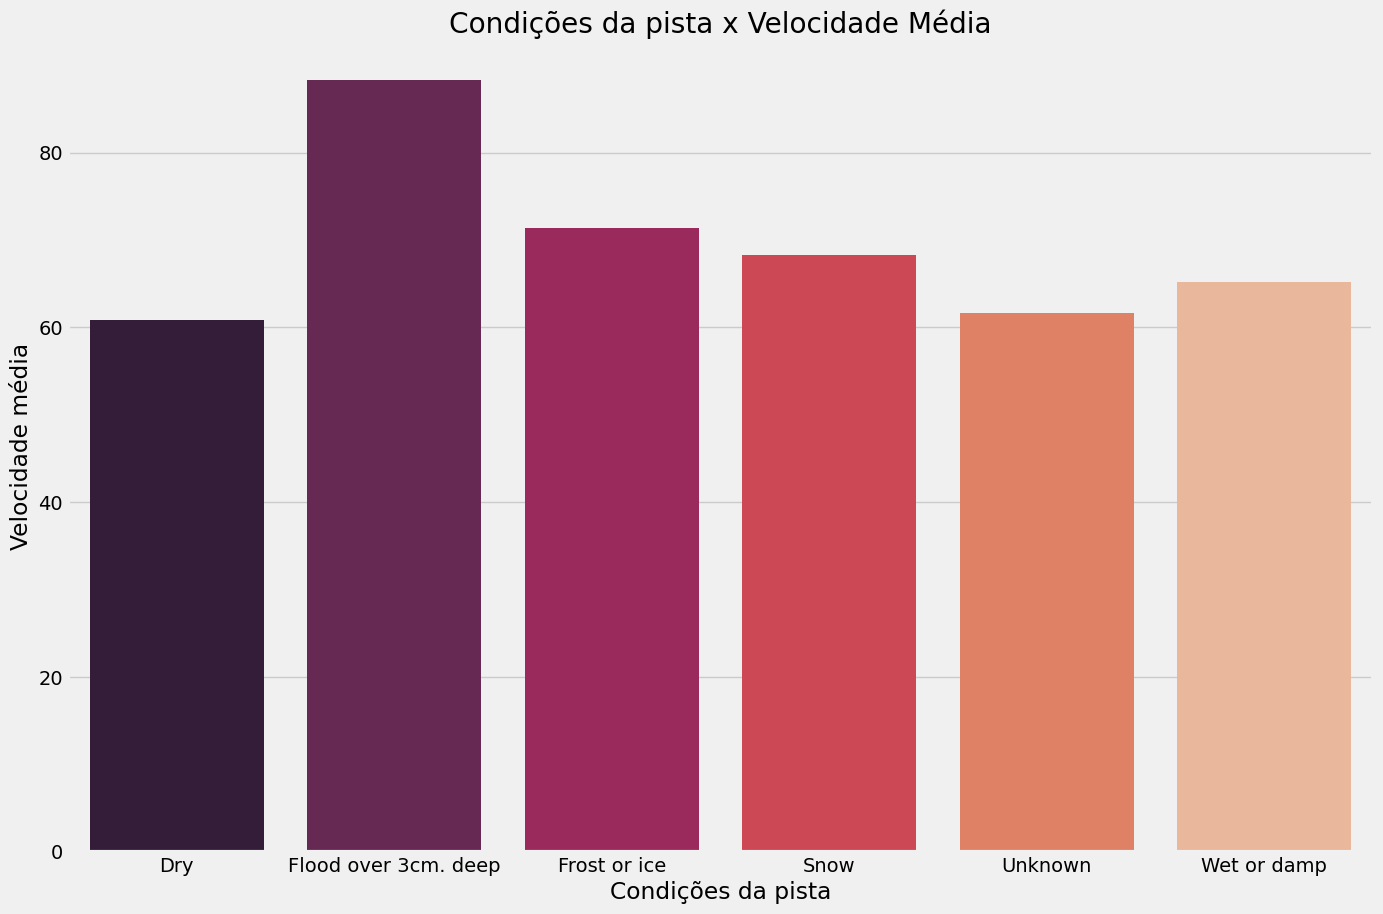

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(data = df_road_conditions, x = 'Road_Surface_Conditions', y = "Speed_limit", palette="rocket")
plt.title("Condições da pista x Velocidade Média")
plt.xlabel("Condições da pista")
plt.ylabel("Velocidade média")

Como é esperado, os acidentes em pista seca, ocorreram em valocidades menores, já em chuva forte foram com quase 30km/h a mais em média, indicando uma possível imprudência dos motorista num solo não tão aderente.

In [ ]:
df_day_of_week = df.groupby("Day_of_Week").mean().reset_index()
df_day_of_week

C:\Users\Adriana\AppData\Local\Temp\ipykernel_16532\3391815160.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_day_of_week = df.groupby("Day_of_Week").mean().reset_index()


,Day_of_Week,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles,Speed_limit
0,Friday,52.487481,-1.365727,1.351580,1.845119,62.422479
1,Monday,52.493869,-1.376441,1.331413,1.835238,62.360184
2,Saturday,52.507294,-1.381558,1.421595,1.781937,63.089140
3,Sunday,52.507659,-1.384960,1.456535,1.775072,65.137394
4,Thursday,52.483370,-1.367570,1.326447,1.850687,61.898018
5,Tuesday,52.471466,-1.363267,1.321052,1.848960,61.747862
6,Wednesday,52.465958,-1.349082,1.322503,1.845842,61.948886


C:\Users\Adriana\AppData\Local\Temp\ipykernel_16532\2716358757.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df_day_of_week, x = 'Day_of_Week', y = "Speed_limit", palette="rocket")


Text(0, 0.5, 'Velocidade média')

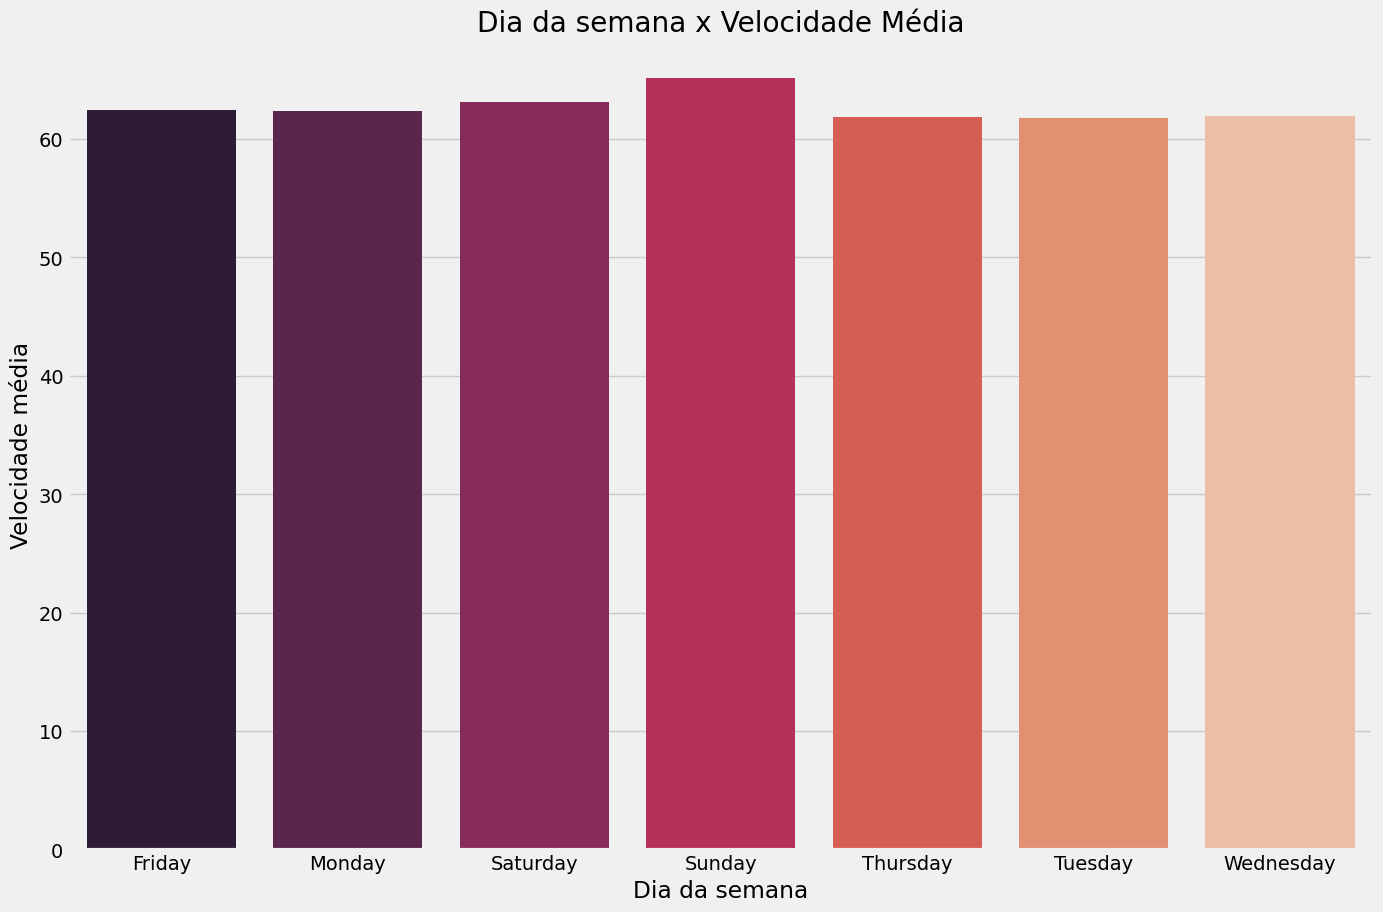

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(data = df_day_of_week, x = 'Day_of_Week', y = "Speed_limit", palette="rocket")
plt.title("Dia da semana x Velocidade Média")
plt.xlabel("Dia da semana")
plt.ylabel("Velocidade média")

Foi levantado como hipótese que a causa para termos mais acidentes na sexta foi por causa da maior velocidade, o que aqui é perceptível que não é, já que domingo teve maior velocidade média e bem menos acidentes.

In [ ]:
df_top_5_districts = df.groupby('Local_Authority_(District)').count().reset_index()
df_top_5_districts = df_top_5_districts.sort_values(by='Accident_Index',ascending=False)
df_top_5_districts = df_top_5_districts.head()
df_top_5_districts

,Local_Authority_(District),Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
24,Birmingham,6165,6165,6165,6165,6165,6165,6165,6165,6165,...,6165,6165,6165,6165,6165,6165,6165,6165,6165,6165
195,Leeds,4140,4140,4140,4140,4140,4140,4140,4140,4140,...,4140,4140,4140,4140,4140,4140,4140,4140,4140,4140
208,Manchester,3132,3132,3132,3132,3132,3132,3132,3132,3132,...,3132,3132,3132,3132,3132,3132,3132,3132,3132,3132
36,Bradford,3006,3006,3006,3006,3006,3006,3006,3006,3006,...,3006,3006,3006,3006,3006,3006,3006,3006,3006,3006
404,Westminster,2811,2811,2811,2811,2811,2811,2811,2811,2811,...,2811,2811,2811,2811,2811,2811,2811,2811,2811,2811


C:\Users\Adriana\AppData\Local\Temp\ipykernel_16532\1495699919.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df_top_5_districts, x = 'Local_Authority_(District)', y = "Accident_Index", palette="rocket")


Text(0, 0.5, 'Total Acidentes')

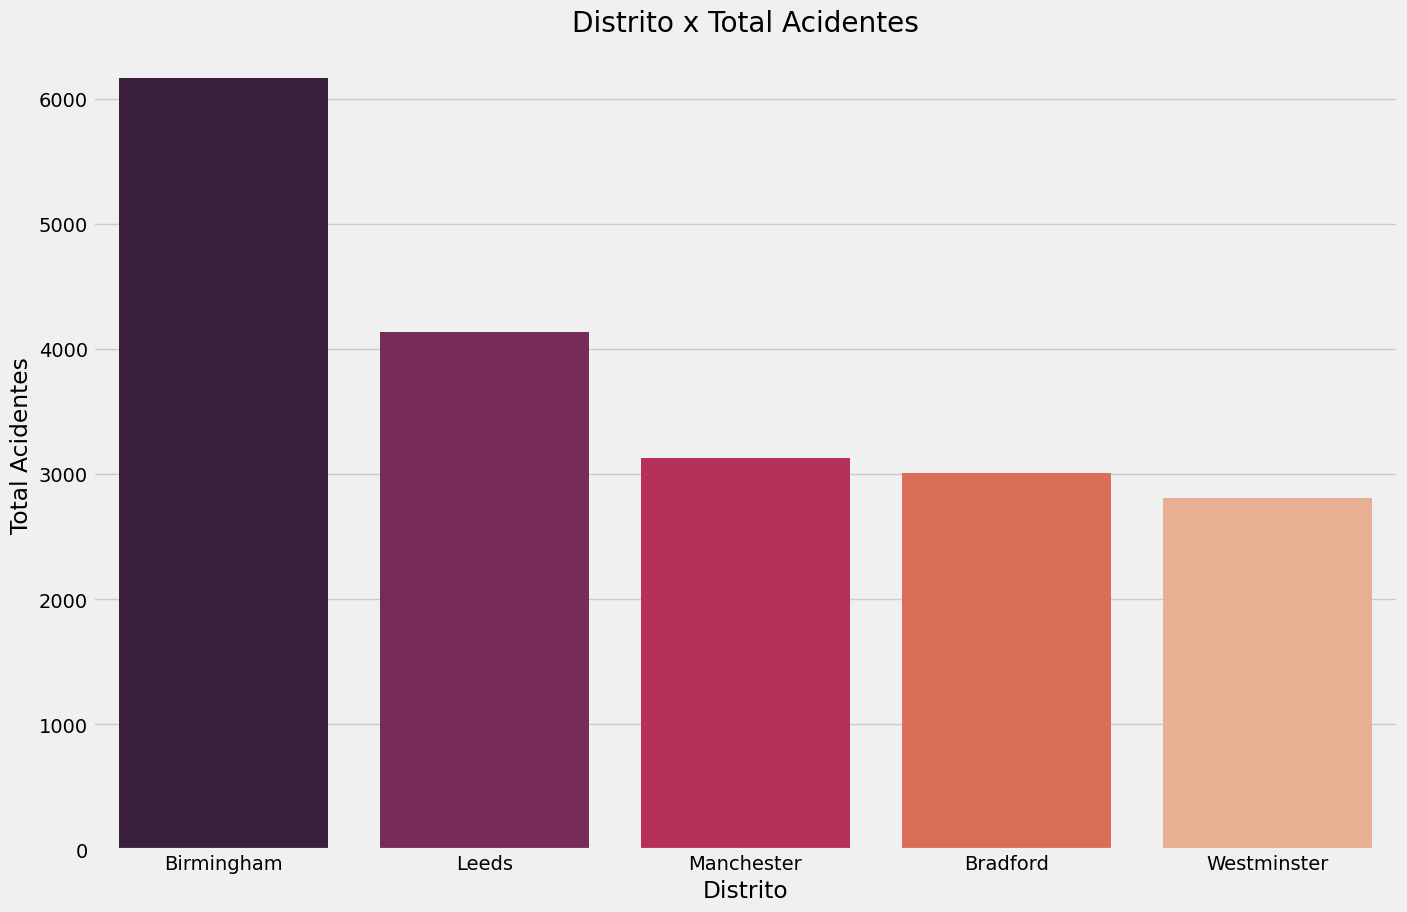

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(data = df_top_5_districts, x = 'Local_Authority_(District)', y = "Accident_Index", palette="rocket")
plt.title("Distrito x Total Acidentes")
plt.xlabel("Distrito")
plt.ylabel("Total Acidentes")

Podemos observar que em Birmingham foi o trecho que mais ocrreu acidentes seguido por Leeds.

Text(0, 0.5, 'Total')

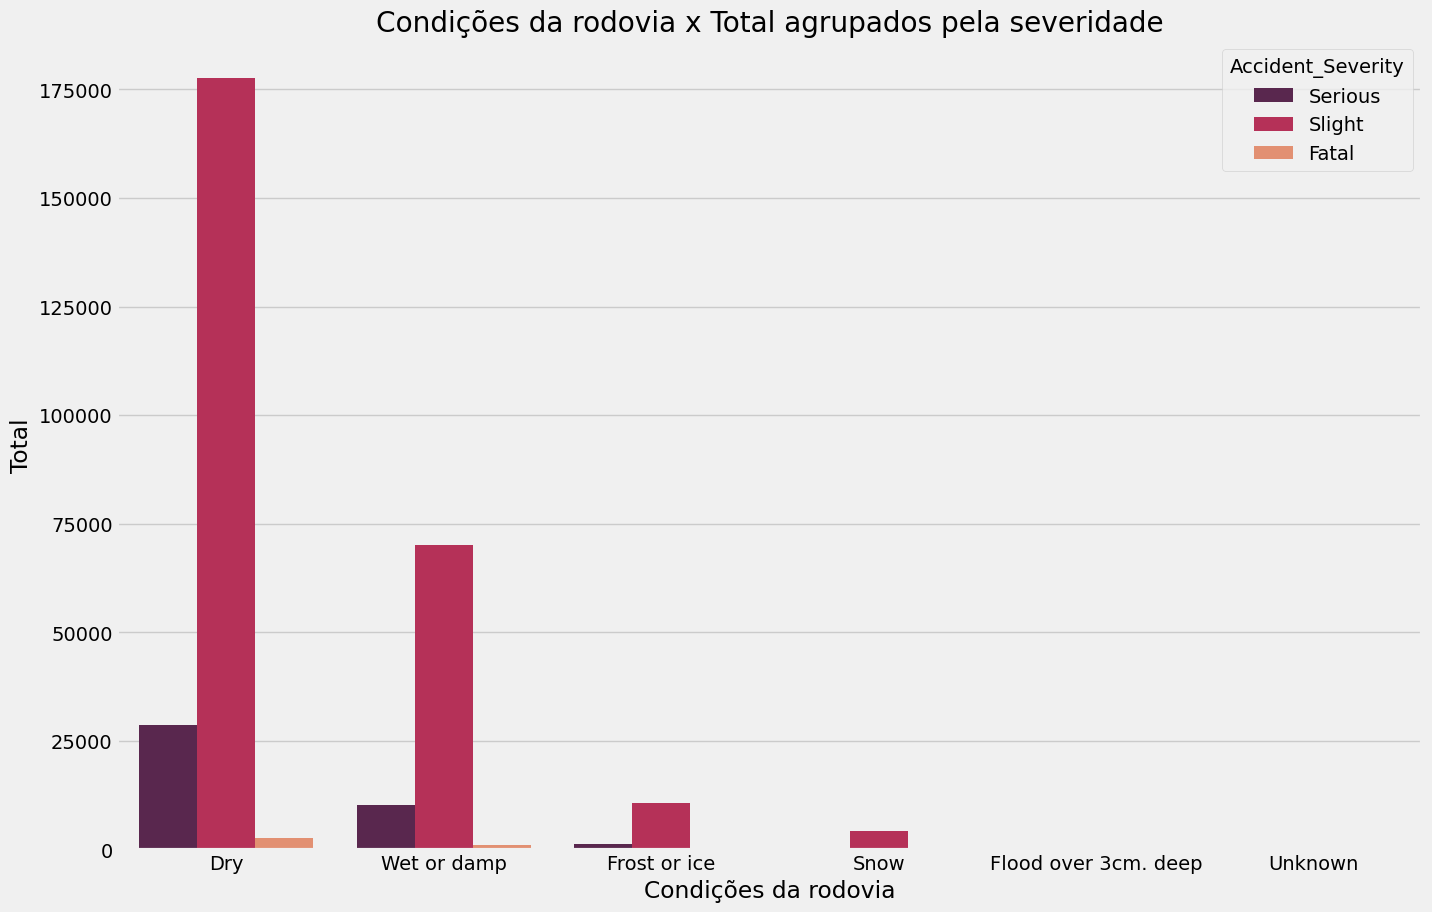

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data = df, x = 'Road_Surface_Conditions', hue="Accident_Severity", palette="rocket")
plt.title("Condições da rodovia x Total agrupados pela severidade")
plt.xlabel("Condições da rodovia")
plt.ylabel("Total")

A condição da rodovia não parece fazer efeito na severidade do acidente.